<a href="https://www.kaggle.com/code/yorkyong/logistic-regression-in-action-titanic-survival?scriptVersionId=160347136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://cdn.britannica.com/92/231192-050-15296715/infographic-Titanic.jpg?w=840&h=460&c=crop)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

Introduction to Logistic Regression Notebook for the "Titanic - Machine Learning from Disaster" Competition

- Welcome to this educational notebook on Logistic Regression, designed to help you understand the fundamental concepts, formulas, notations, and visualizations associated with this powerful machine learning technique. 

- In this notebook, we will use the Titanic dataset from the "Titanic - Machine Learning from Disaster" competition to demonstrate how Logistic Regression works.

- Logistic Regression is a commonly used binary classification algorithm in the field of machine learning. 
- It is particularly useful when we want to predict the probability of an event happening, such as whether a passenger on the Titanic survived or not. 

![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>REFERENCE & ACKNOWLEDGEMENT</b></div>

I would like to express my sincere gratitude to the following sources for their valuable contributions and insights, which have greatly enriched my understanding of logistic regression and the analysis of the Titanic dataset:

### "Logistic Regression Classifier Tutorial" by Prashant Gupta (Kaggle):

- Link: https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial#18.-ROC---AUC-
- Prashant Gupta's comprehensive tutorial on logistic regression and ROC-AUC analysis provided a solid foundation for my knowledge in binary classification. The clear explanations and code examples were instrumental in enhancing my skills in logistic regression modeling.

### "Titanic Top 4% with Ensemble Modeling" by Yassine Ghouzam (Kaggle):

- Link: https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling
- Yassine Ghouzam's exceptional notebook on ensemble modeling for the Titanic dataset served as a source of inspiration and reference. The comprehensive analysis and innovative modeling techniques demonstrated in the notebook greatly influenced my approach to the dataset.

### YouTube Video Tutorial Series by Coding Lane:

- Link: https://youtu.be/U1omz0B9FTw?list=PLuhqtP7jdD8Chy7QIo5U0zzKP8-emLdny
- Coding Lane's YouTube tutorial series on machine learning and data science provided valuable insights and practical knowledge on logistic regression, among other topics. His clear explanations and hands-on examples have been instrumental in my learning journey.










# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>UNDERSTANDING LOGISTIC REGRESSION</b></div>

### <b><span style='color:#FFCE30'> 3.1 |</span> Introduction to Binary Classification</b>
- Binary classification is a fundamental task in machine learning where the goal is to categorize data points into one of two classes: positive (1) or negative (0). 
- In the context of the Titanic dataset, we aim to predict whether a passenger survived (1) or did not survive (0).

### <b><span style='color:#FFCE30'> 3.2 |</span> Logistic Function and Sigmoid Curve</b>
- Logistic Regression utilizes the logistic (sigmoid) function to model the probability of a data point belonging to the positive class. 
- The logistic function transforms any real-valued number into a value between 0 and 1, making it suitable for probability estimation.

- The logistic (sigmoid) function is defined as:


Where:
1. $\mathbf{g(z)}$ is the logistic function output.
2. $\mathbf{(z)}$ is a linear combination of features and model coefficients.


Let's visualize the sigmoid curve:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

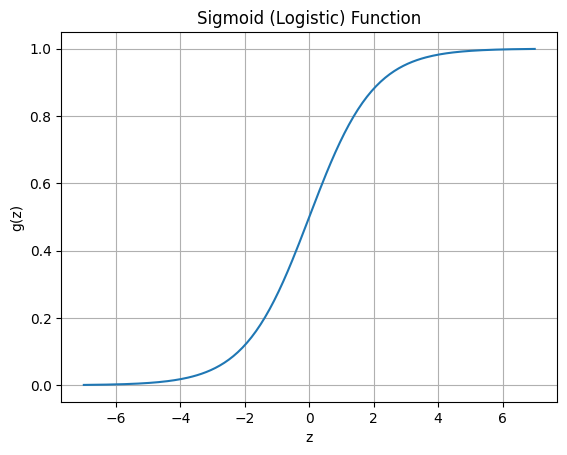

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-7, 7, 200)
y = sigmoid(z)

plt.plot(z, y)
plt.title('Sigmoid (Logistic) Function')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)
plt.show()

The sigmoid curve is a good model for binary classification for several reasons:

1. **S-Shaped Curve:** The sigmoid function produces an S-shaped curve, which is well-suited for binary classification. It smoothly transitions between 0 and 1, making it ideal for modeling probabilities where the outcome is binary (0 or 1).

2. **Output in [0, 1] Range:** The sigmoid function always produces output values in the range [0, 1], ensuring that the predicted probabilities fall within a valid probability range. This aligns with the probabilistic interpretation of binary classification.

3. **Monotonic and Continuous:** The sigmoid curve is monotonic, meaning it always increases or decreases as the input varies. This monotonicity helps maintain the order of probabilities, ensuring that higher input values lead to higher probabilities of the positive class.

4. **Non-Linear Transformation:** Logistic regression combines the linear combination of features and coefficients with the sigmoid function. This non-linear transformation allows the model to capture complex relationships between the features and the binary outcome.

5. **Differentiable:** The sigmoid function is differentiable, which is crucial for optimization algorithms like gradient descent during model training. This differentiability allows the model to learn the best parameters (coefficients) to fit the data.

6. **Interpretability:** The sigmoid curve's parameters (e.g., the steepness of the curve) can be interpreted in terms of how they affect the decision boundary and the rate of change of the predicted probabilities. This makes it easier to interpret the model's behavior.

7. **Log-Odds Interpretation:** The log-odds transformation of the sigmoid curve provides a linear relationship between features and the log-odds of the positive class. This linear relationship allows for straightforward interpretation of feature effects on the outcome.

### <b><span style='color:#FFCE30'> 3.3 |</span> Log-Odds and the Logistic Regression Hypothesis</b>

The logistic regression hypothesis relates the probability of an event to a linear combination of feature values. It is expressed as:

$\mathbf {h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}}$

Where:
- $\mathbf {h_{\theta}(x)}$ is the predicted probability that $\mathbf{ y = 1 }$ for input $\mathbf{ x }$. The probability that the binary outcome (y) is 1 (positive class) given the input features x.
- $\mathbf{\theta}$ represents the model's parameters (coefficients). These coefficients determine how much each feature contributes to the prediction.
- $\mathbf{ x }$ is the input feature vector.
- $\mathbf{e}$ is the base of the natural logarithm (Euler's number).The exponential function with base e is used to transform the linear combination of $\mathbf {\theta^Tx}$ into a probability value between 0 and 1.
- $\mathbf {-\theta^Tx}$ represents the linear combination of feature values and model coefficients. This part calculates the linear combination of input features and their associated coefficients.
- $\mathbf{1 + e^{-\theta^Tx}}$ is the denominator of the fraction. This denominator normalizes the linear combination to ensure that the output probability falls within the range [0, 1].


The log-odds (logit) of the logistic regression hypothesis is given by:

$\mathbf {log\left(\frac{h_{\theta}(x)}{1 - h_{\theta}(x)}\right) = \theta^Tx}$

The log-odds is also known as the "logit" and here's why log-odds are used:

1. **Linear Relationship:** Logistic regression aims to model a linear relationship between the input features and the log-odds (logit) of the positive class. This linear relationship is important because it allows us to express how changes in the features affect the probability of the event being predicted. When we take the logarithm of the odds ratio, it linearizes this relationship, making it easier to work with mathematically.

2. **Interpretability:** The log-odds scale provides a more interpretable way to understand the impact of each feature on the probability of the event. A one-unit change in a feature corresponds to a change in the log-odds by a constant amount (the coefficient associated with that feature). This makes it easier to discuss and compare the effects of different features on the prediction.

3. **Symmetry Around Zero:** The log-odds can take both positive and negative values, which means that a log-odds of zero corresponds to a 50% probability of the positive class. This symmetry around zero simplifies the interpretation and allows for more flexibility in modeling both positive and negative associations between features and the outcome.

4. **Numerical Stability:** In some cases, working with the log-odds can provide numerical stability, especially when dealing with extreme values. The logit function helps prevent issues related to numerical precision when dealing with very large or very small probabilities.


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>PREPARING THE DATA</b></div>

### Load Data

In [3]:
# Load data
##### Load train and Test set

train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/train.csv")
IDtest = test["PassengerId"]

### Check for Missing values

In [4]:
# Fill empty and NaNs values with NaN
dataset = train.fillna(np.nan)

# Check for Null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Infos
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
### Summarize data
# Summarie and statistics
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>EXPLORATORY DATA ANALYSIS</b></div>

### <b><span style='color:#FFCE30'> 5.1 |</span> Numeric Values</b>

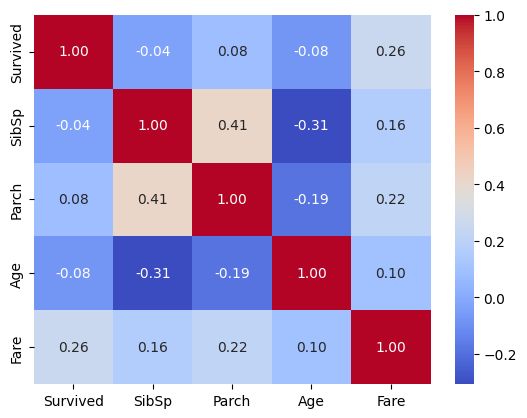

In [7]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
g = sns.heatmap(train[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

- **Fare Feature Significance:** The correlation heatmap indicates that the "Fare" feature exhibits a notable correlation with the survival probability. This correlation suggests that passengers who paid higher fares are more likely to have survived. The positive correlation coefficient signifies that as the fare amount increases, the chance of survival also tends to increase. This finding aligns with the common intuition that passengers in higher-class cabins, often associated with higher fares, had a better chance of survival.

- **Other Features' Correlation:** On the other hand, the correlation coefficients for "SibSp," "Parch," and "Age" with survival are relatively low and do not show strong statistical significance. However, it is important to note that low correlation coefficients do not imply these features are not useful for prediction. These features may still contain valuable information about subpopulations that exhibit different survival rates.

### Analysis of SibSp vs. Survival Probability

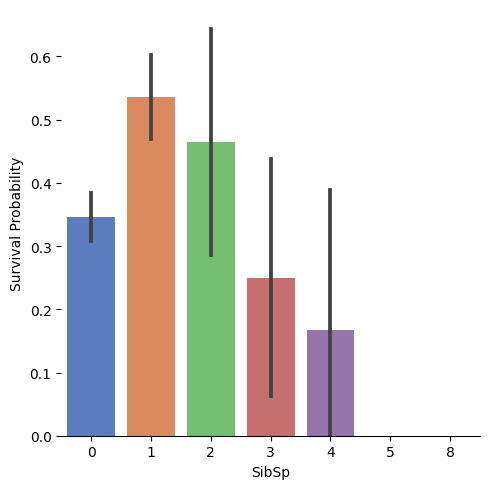

In [8]:
# Explore SibSp feature vs Survived
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar", height=5, palette="muted")
g.despine(left=True)
g.set_ylabels("Survival Probability")

Upon exploring the relationship between the number of siblings/spouses ("SibSp") a passenger had and their survival probability, we observe the following:

1. **Fewer Siblings/Spouses, Higher Survival:** 
- Passengers who were either traveling alone (0 SibSp) or with one or two other individuals (SibSp 1 or 2) tend to have a higher chance of survival. 
- This finding suggests that those with fewer companions in this category were more likely to survive.

2. **Large Families, Lower Survival:** 
- In contrast, passengers with a larger number of siblings/spouses (e.g., SibSp 3, 4, 5, 8) had notably lower survival probabilities. 
- It appears that larger family groups had a reduced likelihood of survival.

### Analysis of Age Distribution and Survival

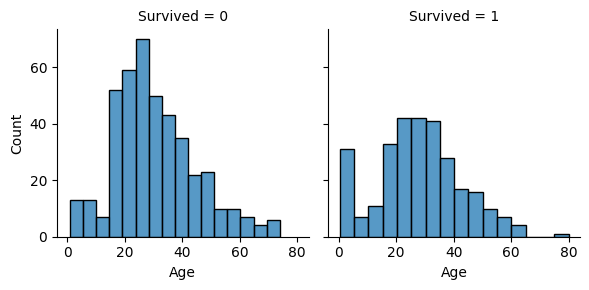

In [9]:
# Explore Age vs Survived
g = sns.FacetGrid(train, col='Survived')
g = g.map(sns.histplot, "Age")



Upon examining the distribution of passenger ages, we observe the following:

- The age distribution appears to be tailed and may resemble a Gaussian (normal) distribution.
- Notably, the age distributions differ between passengers who survived and those who did not.

Specifically:
- There is a peak in the age distribution corresponding to young passengers, indicating that a higher proportion of young individuals survived.
- Conversely, passengers in the age range of 60-80 have a lower likelihood of survival.

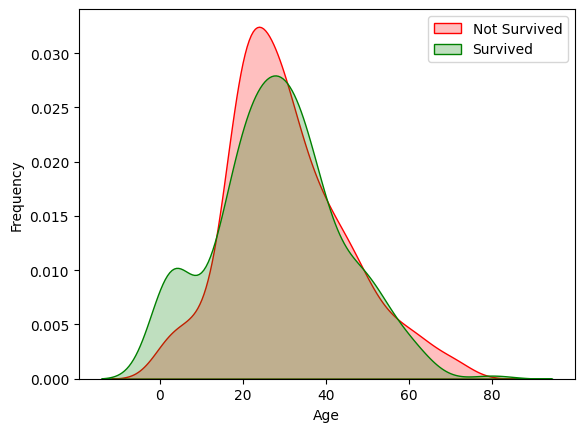

In [10]:
# Explore Age distibution 
g = sns.kdeplot(train["Age"][(train["Survived"] == 0) & (train["Age"].notnull())], color="Red", fill = True)
g = sns.kdeplot(train["Age"][(train["Survived"] == 1) & (train["Age"].notnull())], ax =g, color="Green", fill= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

- Indeed, the observed peak in survival rates for babies and very young children in the age range of 0-5 years could be related to the "women and children first" protocol often followed in emergency situations, including maritime disasters like the Titanic sinking.
- During emergencies at sea, such as shipwrecks, there is a longstanding tradition of prioritizing the evacuation of women and children over other passengers. 
- This practice is rooted in the principle of protecting the most vulnerable individuals first and ensuring their safety.

### Skewed Fare Distribution and Log Transformation

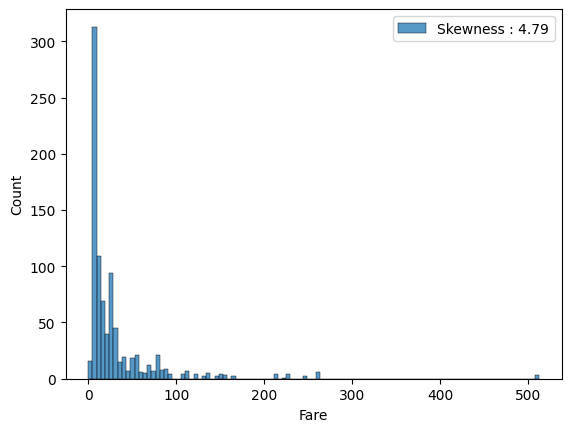

In [11]:
# Explore Fare distribution 
g = sns.histplot(dataset["Fare"], label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

- The distribution of "Fare" values exhibits significant skewness, with a long tail towards very high values. 
- This skewed distribution can potentially have a disproportionate influence on the model, even after scaling the features.
- To address this issue, it is advisable to apply a log transformation to the "Fare" feature. 
- The log transformation can help reduce the skewness and make the distribution more symmetrical. 
- By doing so, we can mitigate the impact of extreme high values and improve the model's performance when using "Fare" as a predictor.

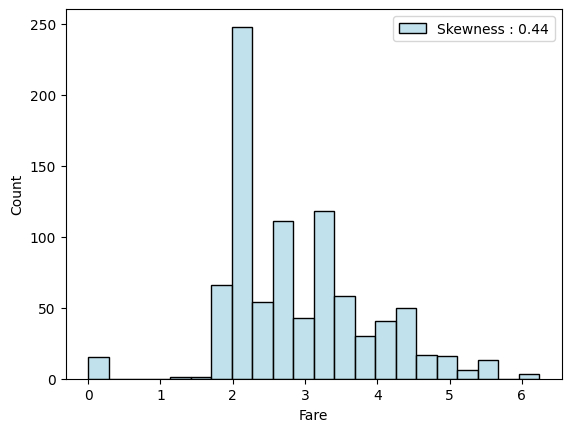

In [12]:
# Apply log to Fare to reduce skewness distribution
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.histplot(dataset["Fare"], color="lightblue", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

### <b><span style='color:#FFCE30'> 5.2 |</span> Categorical Values</b>

### Gender and Survival Probability

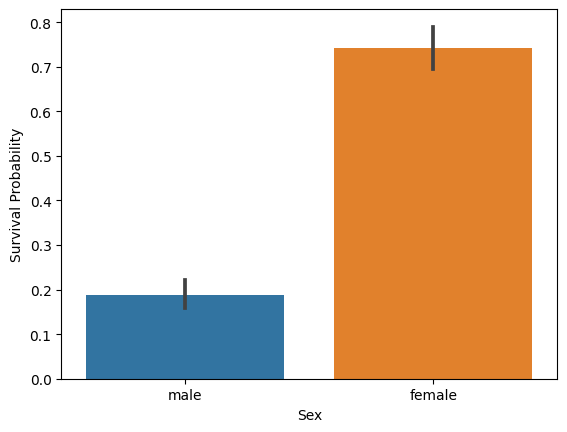

In [13]:
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")

The bar plot comparing "Sex" and "Survived" shows a clear and significant pattern:

- Female passengers have a substantially higher chance of survival compared to male passengers.
- This as well confirms out earlier EDA on age where we related to the "women and children first" protocol often followed in emergency situations.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>LOGISTIC REGRESSION MODEL</b></div>

### <b><span style='color:#FFCE30'> 6.1 |</span> Objective Function</b>

- The logistic regression objective function aims to find the best values for the weight matrix W and bias term b such that the predicted probabilities $\mathbf{\hat{y}}$ closely match the observed binary outcomes $\mathbf{y}$. 
- The sigmoid function ensures that the predicted probabilities are bounded between 0 and 1, making it suitable for binary classification tasks.
- Refer to this youtube video by Coding Lane for a 6mins intro: https://www.youtube.com/watch?v=U1omz0B9FTw&list=PLuhqtP7jdD8Chy7QIo5U0zzKP8-emLdny

In logistic regression, the hypothesis is defined as:

$
y = w_nX_n + w_{n-1}X_{n-1} + \ldots + w_1X_1 + b
$

- $y$ represents the linear combination of the input features $(X_1, X_2, \ldots, X_n)$ weighted by their corresponding coefficients $(w_1, w_2, \ldots, w_n)$.
- $b$ is the bias term.

Transposing the Weight Matrix $(\mathbf{W})$:
To represent the linear equation in a matrix form, we can transpose the weight vector  $(\mathbf{W})$ to a row vector $\mathbf{W}^T$ because it simplifies matrix multiplication. This allows us to express the equation as:

$
y = {W}^T \mathbf{X} + b
$

- $\mathbf{W}^T$ is the transpose of the weight matrix $\mathbf{W}$.
- $\mathbf{X}$ represents the feature vector

Applying the Sigmoid Function:
To convert the linear combination $\mathbf{W}^T \mathbf{X} + b$ into a probability between 0 and 1, we apply the sigmoid function $(\sigma)$:

$
\hat{y} = \sigma(\mathbf{W}^T \mathbf{X} + b)
$

- $\hat{y}$ represents the predicted probability that the binary outcome $y$ is 1 given the input features $\mathbf{X}$ and the model parameters $\mathbf{W}$ and bias $(b)$.
- $\sigma(\mathbf{W}^T \mathbf{X} + b)$ calculates the sigmoid of the linear combination $\mathbf{W}^T \mathbf{X} + b$.



### <b><span style='color:#FFCE30'> 6.2 |</span> Cost Function and Optimization (Gradient Descent)</b>

To train our logistic regression model, we need to define a cost function that measures the error between the predicted probabilities and the actual outcomes. The cost function for logistic regression is defined as:

$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})\log(1 - h_{\theta}(x^{(i)}))\right] $

Where:
- $ J(\theta) $ is the cost function.
- $ m $ is the number of training examples.
- $ y^{(i)} $ is the actual outcome (1 for survived, 0 for not survived) for the $ i $-th passenger.
- $ h_{\theta}(x^{(i)}) $ is the predicted probability of survival for the $ i $-th passenger.

We will optimize the model's parameters $ \theta $ using gradient descent to minimize the cost function $ J(\theta) $.


### <b><span style='color:#FFCE30'> 6.3 |</span> Visualisation of Logistic Regression Plane</b>

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


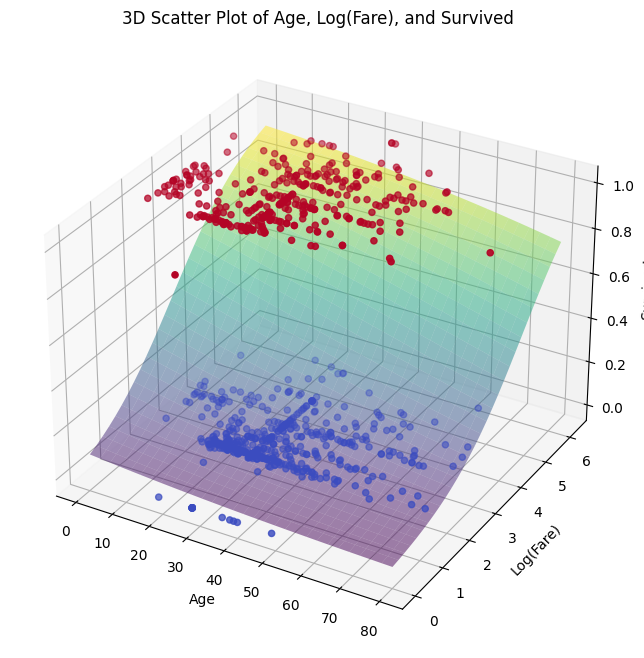

In [14]:
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

# Load the train data (replace file path as needed)
train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Handle missing values in the "Age" column by filling with the median age
train['Age'].fillna(train['Age'].median(), inplace=True)

# Apply log transformation to "Fare" to reduce skewness
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

# Extract features and target variable
X_age_fare = train[['Age', 'Fare']]
y = train['Survived'].values

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(X_age_fare['Age'], X_age_fare['Fare'], y, c=y, cmap='coolwarm', marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Log(Fare)')
ax.set_zlabel('Survived')
ax.set_title('3D Scatter Plot of Age, Log(Fare), and Survived')

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_age_fare, y)

# Create a meshgrid for the logistic regression plane
age_range = np.linspace(X_age_fare['Age'].min(), X_age_fare['Age'].max(), 30)
fare_range = np.linspace(X_age_fare['Fare'].min(), X_age_fare['Fare'].max(), 30)
age_mesh, fare_mesh = np.meshgrid(age_range, fare_range)
X_test_3d = np.column_stack((age_mesh.ravel(), fare_mesh.ravel()))
y_pred = model.predict_proba(X_test_3d)[:, 1].reshape(age_mesh.shape)

# Plot the logistic regression plane
ax.plot_surface(age_mesh, fare_mesh, y_pred, cmap='viridis', alpha=0.5)
plt.show()


- The output of this code is a 3D visualization that helps us understand the relationship between the passengers' age, the log-transformed fare they paid, and their survival outcome on the Titanic.

- The 3D scatter plot displays points in a three-dimensional space, where the x-axis represents age, the y-axis represents log-transformed fare, and the color and markers distinguish between passengers who survived and those who did not.

- The logistic regression plane is overlaid on the scatter plot, showing how the model predicts the probability of survival for different combinations of age and log-transformed fare. The color intensity of the plane represents the likelihood of survival, with brighter areas indicating higher survival probabilities.

- This visualization helps us visually assess how these two features (age and fare) contribute to the logistic regression model's predictions regarding survival on the Titanic. It provides insights into how the model separates passengers who survived from those who did not based on these features.

### <b><span style='color:#FFCE30'> 6.4 |</span> Interpreting Model Coefficients</b>

- Once our model is trained, we can interpret the model coefficients $( \theta )$ to understand how the "Fare" feature influences the probability of survival. 
- The sign and magnitude of the coefficient associated with "Log(Fare)" "Age" "Gender" will tell us whether an increase in fare corresponds to an increase or decrease in the likelihood of survival.


In [15]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Handle missing values in the "Age" column by filling with the median age
train['Age'].fillna(train['Age'].median(), inplace=True)

# Apply log transformation to "Fare" to reduce skewness
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

# Encode 'Sex' column to numeric values (0 for female, 1 for male)
encoder = LabelEncoder()
train['Sex'] = encoder.fit_transform(train['Sex'])

# Extract features and target variable
X = train[['Age', 'Fare', 'Sex']]
y = train['Survived']

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Interpret coefficients
feature_names = ['Age', 'Log(Fare)', 'Sex']
for i, feature in enumerate(feature_names):
    print(f"Coefficient for {feature}: {coefficients[0][i]}")

# Interpret the intercept
print("Intercept:", intercept[0])


Coefficients: [[-0.01166967  0.63653046 -2.26565692]]
Intercept: [-0.63866786]
Coefficient for Age: -0.011669674370632288
Coefficient for Log(Fare): 0.6365304614416082
Coefficient for Sex: -2.2656569155029884
Intercept: -0.6386678636934863


Now, let's interpret these coefficients:

- Coefficient for Age: -0.011669674370632288

Interpretation: For every one-unit increase in age, the log-odds of survival decrease by approximately 0.0117. In other words, as passengers get older, their probability of survival decreases slightly.

- Coefficient for Log(Fare): 0.6365304614416082

Interpretation: For every one-unit increase in the logarithm of Fare, the log-odds of survival increase by approximately 0.6365. This suggests that passengers who paid higher fares are more likely to survive.

- Coefficient for Sex: -2.2656569155029884

Interpretation: This coefficient corresponds to the "Sex" feature, where Female is encoded as 0 and Male is encoded as 1. For male passengers (encoded as 1), the log-odds of survival decrease by approximately 2.2657 compared to female passengers (encoded as 0). This indicates that females are significantly more likely to survive than males.

- Intercept: -0.6386678636934863

Interpretation: The intercept represents the log-odds of survival when all predictor variables (Age, Log(Fare), and Sex) are zero. In this context, it doesn't have a direct intuitive interpretation, but it serves as a baseline log-odds value.

**Interpreting the Coefficients:**

- Coefficient for Age: -0.011669674370632288
- Coefficient for Log(Fare): 0.6365304614416082
- Coefficient for Sex: -2.2656569155029884
- Intercept: -0.6386678636934863

**Logistic Regression Formula:**

The logistic regression formula is expressed as:

$
\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \cdot X_{\text{Age}} + \beta_2 \cdot X_{\text{Log(Fare)}} + \beta_3 \cdot X_{\text{Sex}}
$

Where:

- $\log$ is the natural logarithm (base e).
- $p$ is the predicted probability of survival (\(y\)).
- $\beta_0$ is the intercept: -0.6386678636934863.
- $\beta_1$ is the coefficient for Age: -0.011669674370632288.
- $\beta_2$ is the coefficient for Log(Fare): 0.6365304614416082.
- $\beta_3$ is the coefficient for Sex: -2.2656569155029884.

So, the logistic regression formula with these coefficients is:

$
\log\left(\frac{p}{1-p}\right) = -0.6386678636934863 - 0.011669674370632288 \cdot X_{\text{Age}} + 0.6365304614416082 \cdot X_{\text{Log(Fare)}} - 2.2656569155029884 \cdot X_{\text{Sex}}
$

This formula relates the log-odds of survival $(\log\left(\frac{p}{1-p}\right))$ to the passenger's Age, Logarithm of Fare, and Gender (Sex) encoded as 0 for Female and 1 for Male. It helps predict the probability of survival based on these factors.


### <b><span style='color:#FFCE30'> 6.5 |</span> Decision Boundaries</b>

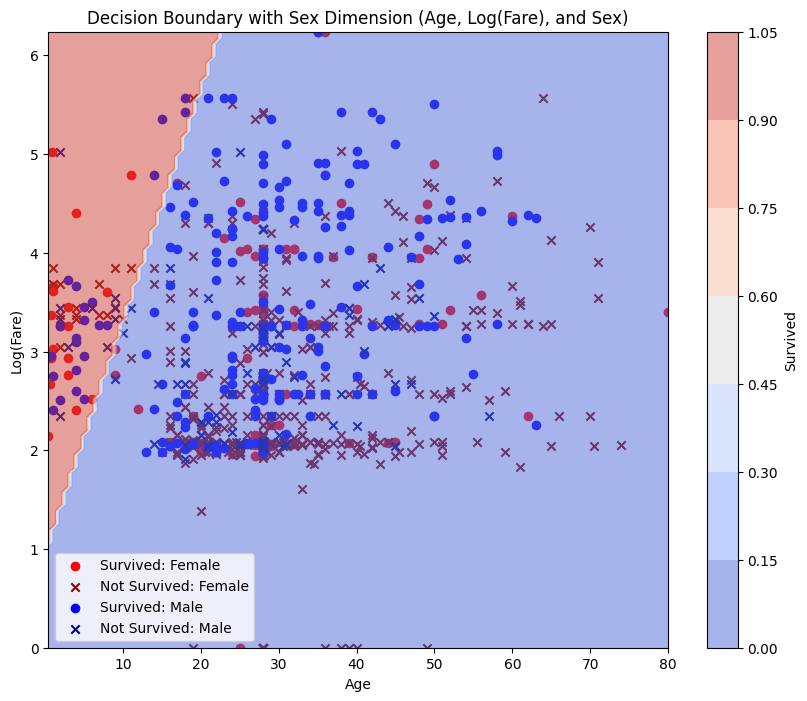

In [16]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the train data (replace file path as needed)
train = pd.read_csv("/kaggle/input/titanic/train.csv")

# Handle missing values in the "Age" column by filling with the median age
train['Age'].fillna(train['Age'].median(), inplace=True)

# Apply log transformation to "Fare" to reduce skewness
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

# Extract features and target variable
X = train[['Age', 'Fare', 'Sex']]
y = train['Survived'].values

# Encode 'Sex' as a binary feature (0 for male, 1 for female) using .loc
encoder = LabelEncoder()
X.loc[:, 'Sex'] = encoder.fit_transform(X['Sex'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Generate a meshgrid of Age and Log(Fare) values
age_range = np.linspace(X['Age'].min(), X['Age'].max(), 100)
fare_range = np.linspace(X['Fare'].min(), X['Fare'].max(), 100)
age_mesh, fare_mesh = np.meshgrid(age_range, fare_range)
X_test_2d = np.column_stack((age_mesh.ravel(), fare_mesh.ravel(), np.zeros_like(age_mesh.ravel())))
X_test_2d[:, 2] = encoder.transform(['female'] * len(X_test_2d))  # Set 'Sex' to female (encoded as 1)
y_pred = model.predict(X_test_2d).reshape(age_mesh.shape)

# Separate survived and non-survived passengers by sex
X_survived_female = X[(y == 1) & (X['Sex'] == 1)]
X_not_survived_female = X[(y == 0) & (X['Sex'] == 1)]
X_survived_male = X[(y == 1) & (X['Sex'] == 0)]
X_not_survived_male = X[(y == 0) & (X['Sex'] == 0)]

# Plot the decision boundary with Age, Log(Fare), and Sex
plt.figure(figsize=(10, 8))

plt.scatter(
    X_survived_female['Age'],
    X_survived_female['Fare'],
    c='r',
    marker='o',
    label='Survived: Female'
)

plt.scatter(
    X_not_survived_female['Age'],
    X_not_survived_female['Fare'],
    c='darkred',
    marker='x',
    label='Not Survived: Female'
)

plt.scatter(
    X_survived_male['Age'],
    X_survived_male['Fare'],
    c='blue',
    marker='o',
    label='Survived: Male'
)

plt.scatter(
    X_not_survived_male['Age'],
    X_not_survived_male['Fare'],
    c='darkblue',
    marker='x',
    label='Not Survived: Male'
)

plt.contourf(age_mesh, fare_mesh, y_pred, cmap='coolwarm', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Log(Fare)')
plt.title('Decision Boundary with Sex Dimension (Age, Log(Fare), and Sex)')
plt.legend()
plt.colorbar(label='Survived')
plt.show()


### Decision Boundary Plot:

- The code generates a decision boundary plot to visualize the model's predictions.
- It creates a meshgrid of values for Age and Log(Fare) to cover the entire feature space.
- The Sex feature is set to female (encoded as 1) for the entire meshgrid, effectively creating a 3D surface.
- The model predicts survival probabilities for each point in the meshgrid.
- The decision boundary is plotted along with scatter points representing passengers:
1. Red circles represent survived females.
2. Dark red "x" markers represent females who did not survive.
3. Blue circles represent survived males.
4. Dark blue "x" markers represent males who did not survive.
5. The contour plot visualizes the logistic regression decision boundary.

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>CONCLUSION</b></div>

Applying logistic regression to the Titanic dataset offers valuable insights into modeling binary classification problems, where the goal is to predict whether passengers survived or not based on a set of features. In this case, Age, Logarithm of Fare (Log(Fare)), and Gender (Sex) were used as predictor variables.

#### Key Takeaways:

- **Data Preprocessing:** Logistic regression requires careful data preprocessing. This involves handling missing values (e.g., filling missing ages with medians) and transforming features (e.g., log-transforming Fare) to ensure that they are suitable for modeling.

- **Feature Engineering:** Feature selection and engineering play a crucial role in model performance. Selecting relevant features and encoding categorical variables (e.g., encoding Sex as a binary feature) can significantly impact the model's ability to make accurate predictions.

- **Standardization:** Standardizing numerical features (Age and Log(Fare)) by scaling them to have mean 0 and standard deviation 1 is essential. Standardization ensures that features are on the same scale, preventing one feature from dominating the others during model training.

- **Visualization:** Visualization is a valuable technique for understanding model behavior. Creating decision boundary plots allows us to see how the logistic regression model separates data points into different classes. It helps identify regions where the model predicts survival and non-survival based on the feature values.

- **Interpretability:** Logistic regression coefficients provide insights into feature importance. The coefficients represent the change in the log-odds of the outcome for a one-unit change in the corresponding feature. Negative coefficients indicate a decrease in the odds of survival, while positive coefficients indicate an increase.

- **Gender Impact:** In this particular analysis, Gender (Sex) had a significant impact on survival predictions. Female passengers had a notably higher probability of survival compared to male passengers, as indicated by the coefficients.